In [1]:
import matplotlib.pyplot as plt
import random
import math
import numpy as np

# Logistic Regression

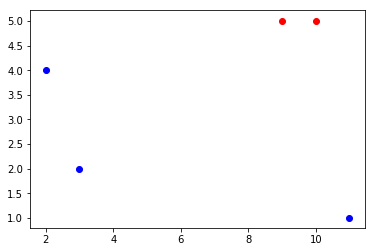

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

X = [[10, 9, 3, 2, 11],
    [5, 5, 2, 4, 1]]

Y_corr = [1, 1, 0, 0, 0]

plt.scatter(X[0][:2], X[1][:2], color="red")
plt.scatter(X[0][2:], X[1][2:], color="blue")

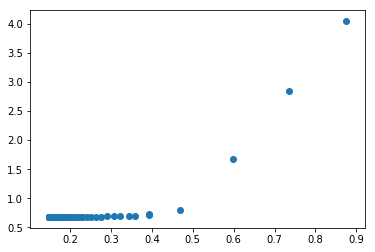

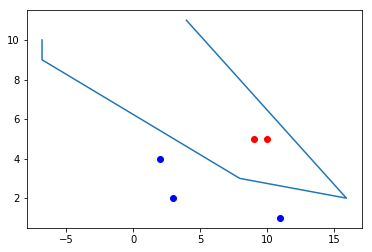

In [3]:
def calc_cost(H, Y):
    costs = []
    for i in range(len(Y)):
        costs.append(-Y[i]*np.log(H[i]) - (1-Y[i])*np.log(1-H[i]))
    return sum(costs) / len(costs)

def train_multilog(X, y, learning_rate, MAX_ITER):
    W = []
    costs = []
    
    w = [random.random() for i in range(len(X))]
    
    for _ in range(MAX_ITER):
        # Hypothesis
        H = [sigmoid(w[0]*X[0][i] + w[1]*X[1][i]) for i in range(len(X[0]))]
        
        # Cost function
        cost = calc_cost(H, y)
        
        W.append(w[1])
        costs.append(cost)
        
        if cost < 0.00000001:
            break
        
        # Gradient descent
        d = 1e-9
        grad = []
        for i in range(len(w)):
            re_W = [w[j] + (d if j == i else 0) for j in range(len(w))]
            H_p = [sigmoid(re_W[0]*X[0][i] + re_W[1]*X[1][i]) for i in range(len(X[0]))]
            
            g = (calc_cost(H_p, y) - calc_cost(H, y)) / d
            
            grad.append(g)
            
        w = [w[i] - (grad[i]*learning_rate) for i in range(len(w))]
        
    plt.subplots(1, 1)
    plt.scatter(W, costs)

    plt.subplots(1, 1)
    plt.scatter(X[0][:2], X[1][:2], color="red")
    plt.scatter(X[0][2:], X[1][2:], color="blue")
    plt.plot([(y[i] - w[1]*X[1][i]) / w[0] for i in range(len(y))], X[0])
        
train_multilog(X, Y_corr, 0.1, 50000)

In [4]:
def normalize(x, nominator):
    return x/nominator*0.99 + 0.01

def calc_hypo(w, x):
    arguments = len(w)
    points = len(x[0])
    
    H = []
    for n in range(points):
        h = 0
        for m in range(arguments):
            h += w[m] * x[m][n]
        H.append(h)
    
    return H

def transpose(x):
    m = len(x)
    n = len(x[0])
    
    x_t = []
    for i in range(n):
        temp = []
        for j in range(m):
            temp.append(x[j][i])
        x_t.append(temp)
    return x_t

In [5]:
def calc_cost(H, Y):
    costs = []
    for i in range(len(Y)):
        costs.append(-Y[i]*np.log(H[i]) - (1-Y[i])*np.log(1-H[i]))
    return sum(costs) / len(costs)


def train_logistic(X, y, learning_rate, MAX_ITER):
    max_n = len(X[0])
    max_m = len(X)
    
    w = [random.random() for i in range(max_m)]
    
    W = []
    costs = []
    
    for _ in range(MAX_ITER):
        # Hypothesis
        H = calc_hypo(w, X)
        
        # Cost function
        cost = calc_cost(H, y)
        
        W.append(w)
        costs.append(cost)
        
        if cost < 0.00000001:
            break
        
        # Gradient descent
        d = 1e-9
        grad = []
        for m in range(max_m):
            re_W = [w[i] + (d if i == m else 0) for i in range(max_m)]
            H_p = calc_hypo(re_W, X)
            
            g = calc_cost(H_p, y) - cost / d
            grad.append(g)
        
        for m in range(max_m):
            w[m] = w[m] - (grad[m] * learning_rate)
    
    y_pred = [sigmoid(w*x) for x in X]
    
    plt.subplots(1,1)
    plt.scatter(W, costs)
    
    plt.subplots(1,1)
    plt.scatter(X, y)
    plt.plot(X,y_pred)

train_logistic(X, Y_corr, 0.01, 1000)

/home/jaeho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


TypeError: can't multiply sequence by non-int of type 'list'